<a href="https://colab.research.google.com/github/Pranjalpranay/Student-Performance-Analysis/blob/main/Student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Assuming the dataset is in the same directory as your notebook
data = pd.read_csv('student-mat-with-outliers.csv')

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,2.541399,22.291345,1,1,3,26.018269,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,7.571065,21.215663,1,1,3,24.199607,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,7.680922,15.438044,2,3,3,17.873831,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,13.621330,7.923995,1,1,5,7.158495,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6.670907,15.639512,1,2,5,18.204129,6,10,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    float64
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [ ]:
print(f"Number of rows before cleaning: {data.shape[0]}")

Number of rows before cleaning: 395


In [ ]:
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']  # Add other relevant numerical columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Potential outliers in {col}: {outliers.shape[0]}")

Potential outliers in age: 1
Potential outliers in Medu: 0
Potential outliers in Fedu: 2
Potential outliers in traveltime: 8
Potential outliers in studytime: 39
Potential outliers in failures: 83
Potential outliers in famrel: 26
Potential outliers in freetime: 12
Potential outliers in goout: 34
Potential outliers in Dalc: 18
Potential outliers in Walc: 0
Potential outliers in health: 0
Potential outliers in absences: 27
Potential outliers in G1: 0
Potential outliers in G2: 13
Potential outliers in G3: 0


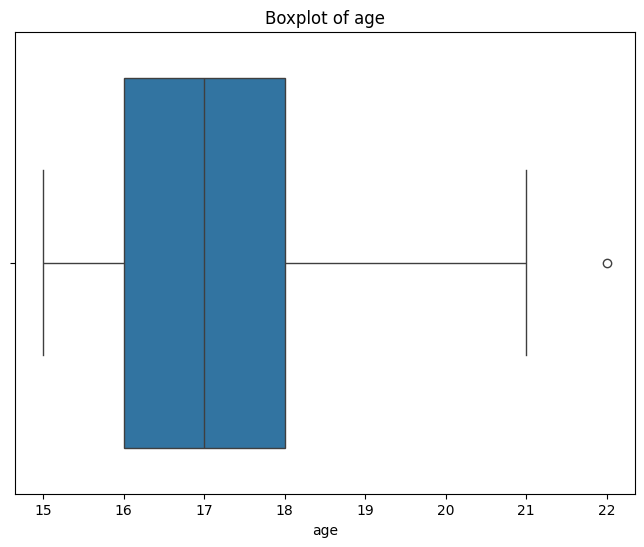

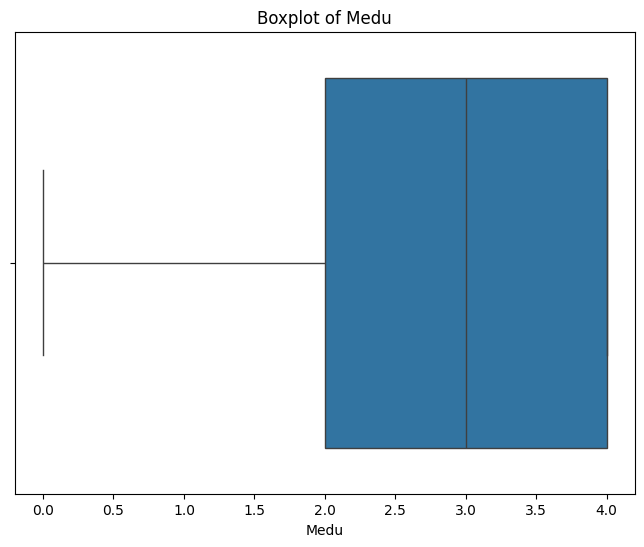

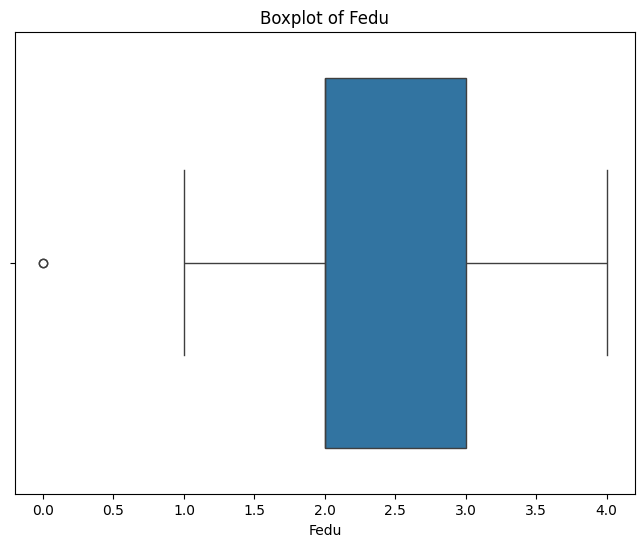

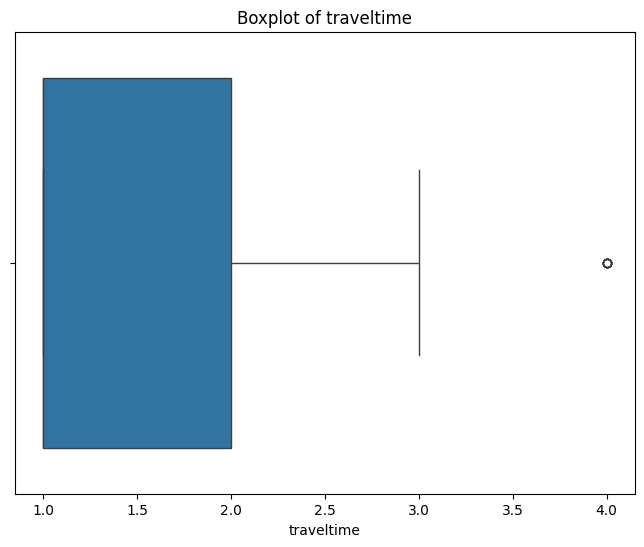

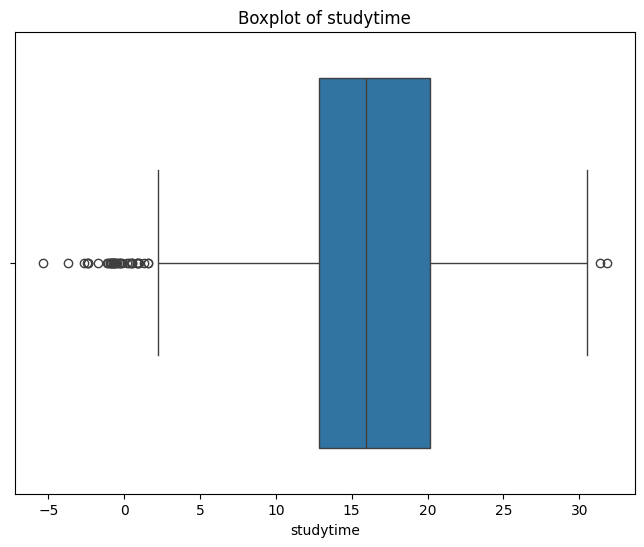

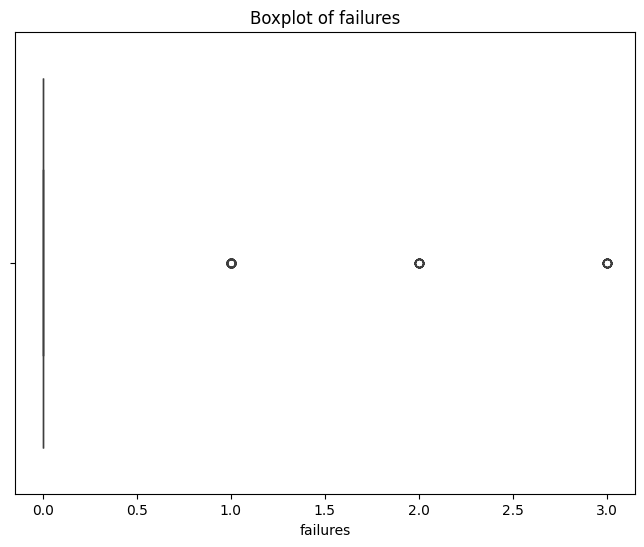

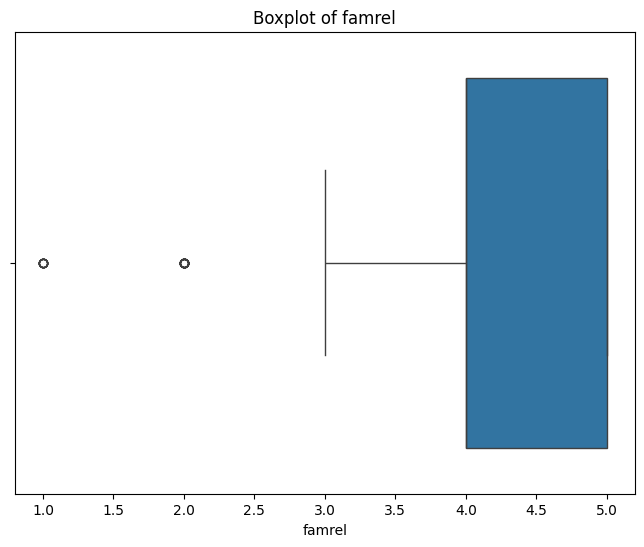

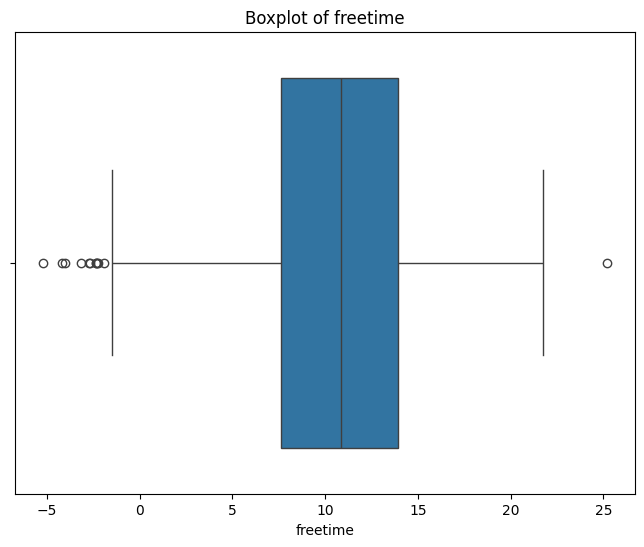

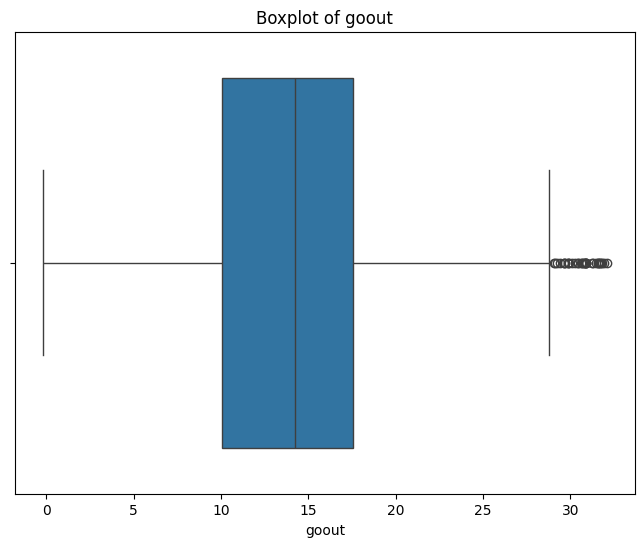

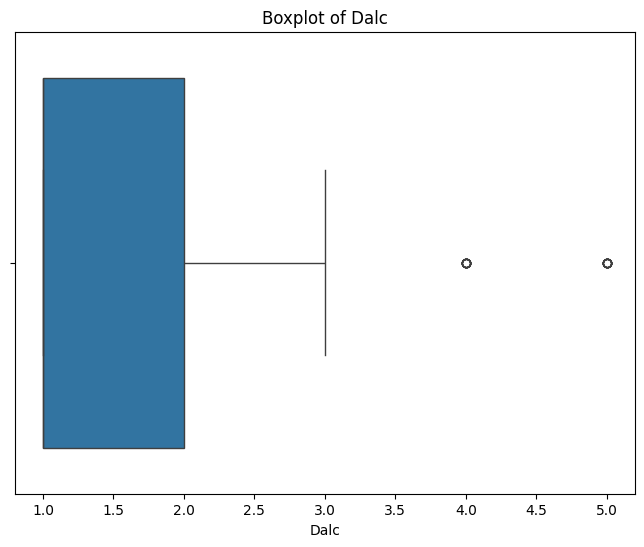

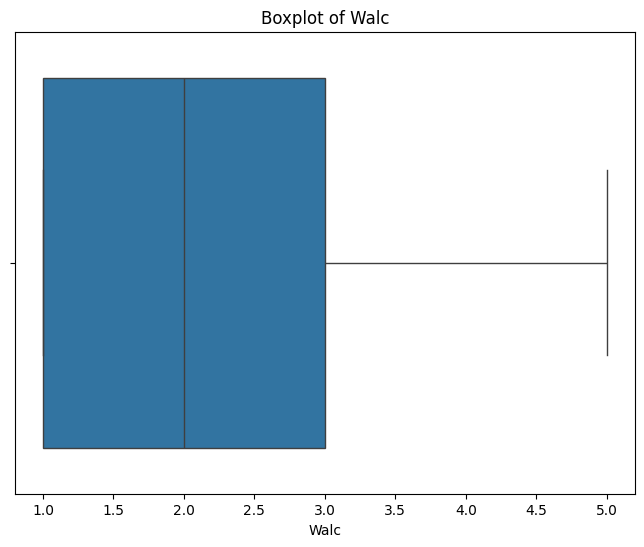

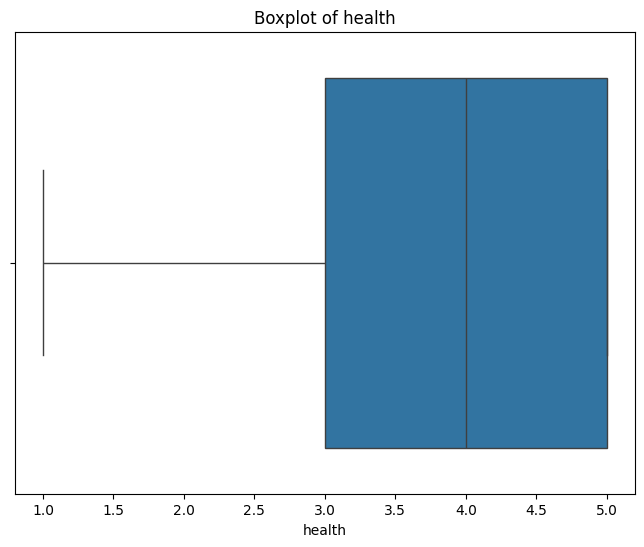

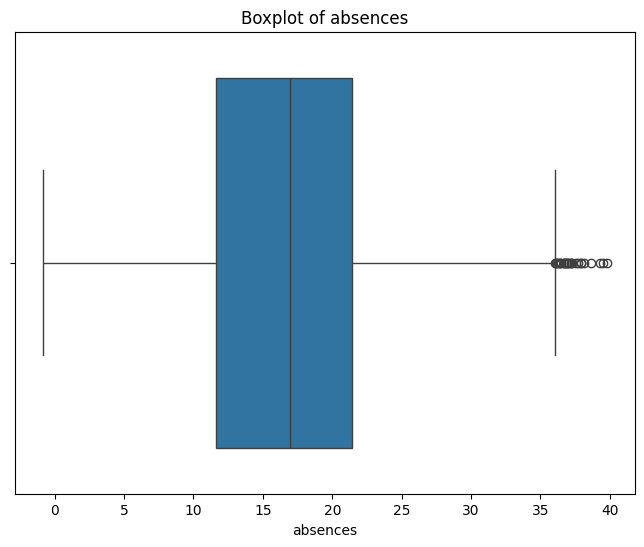

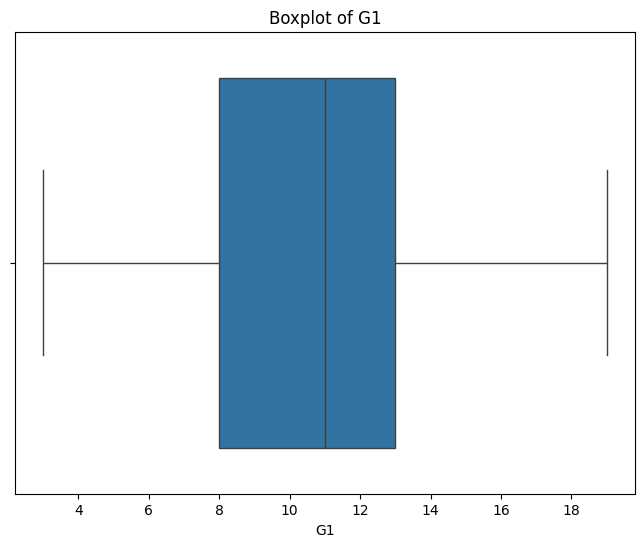

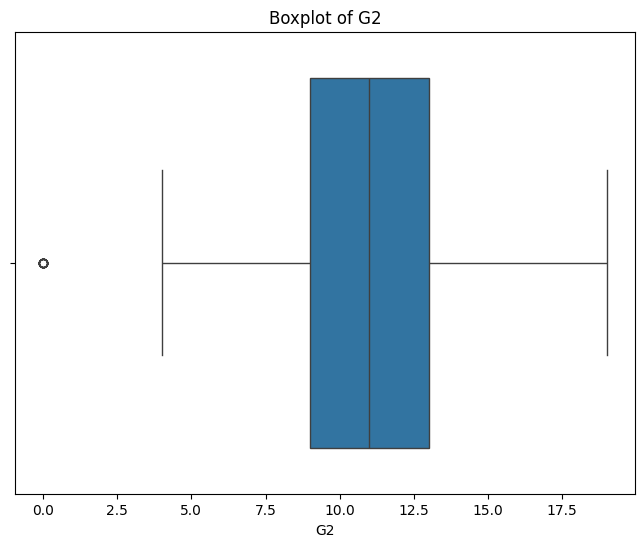

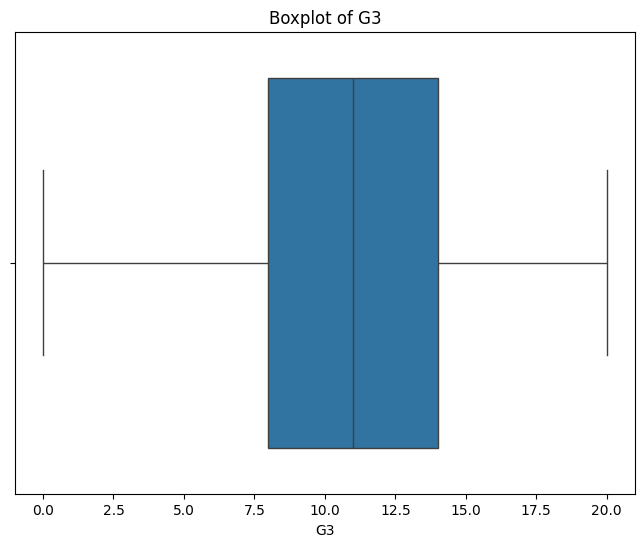

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [ ]:
print(f"Number of rows after cleaning: {data.shape[0]}")

Number of rows after cleaning: 189


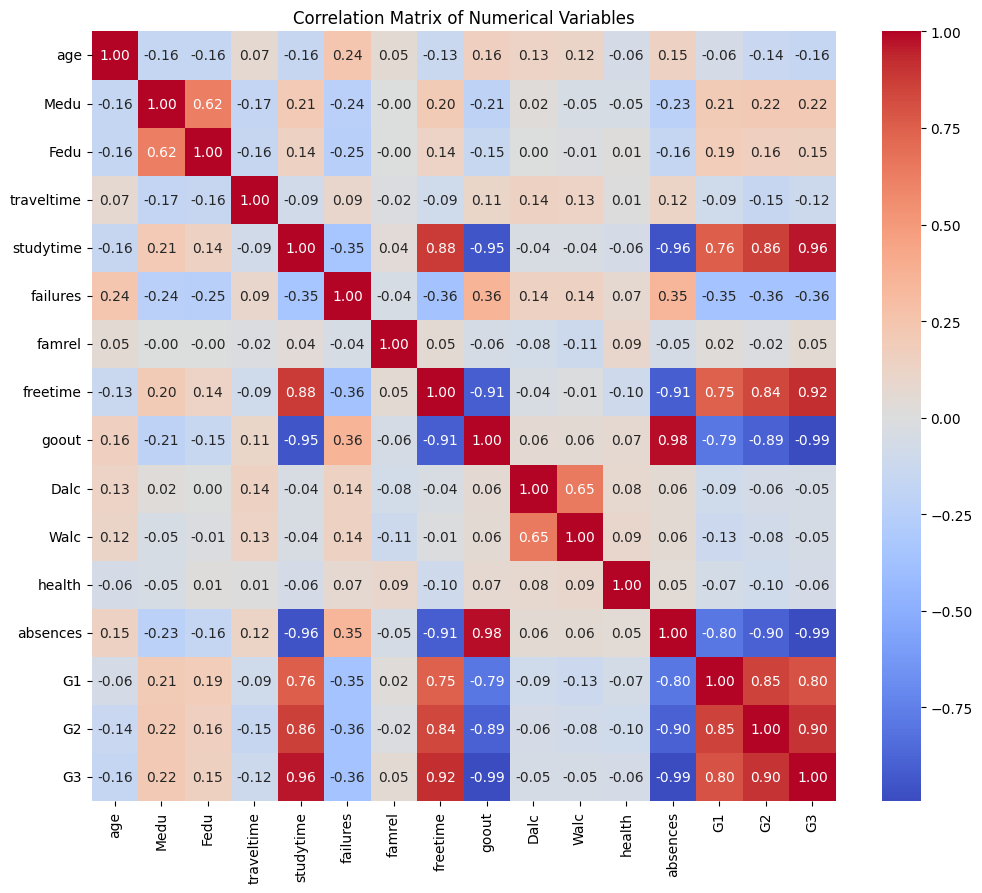

In [ ]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:

correlations_with_G3 = correlation_matrix['G3'].abs().sort_values(ascending=False)
print(correlations_with_G3)

G3            1.000000
absences      0.993082
goout         0.989006
studytime     0.962571
freetime      0.921954
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
traveltime    0.117142
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
Name: G3, dtype: float64


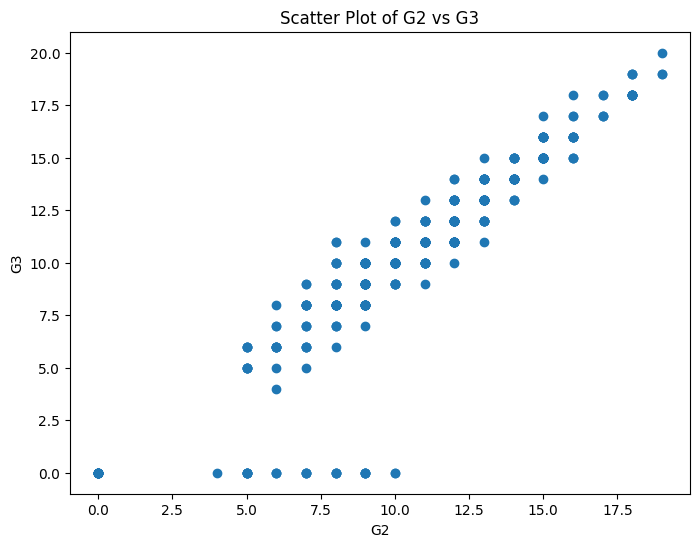

In [ ]:
import matplotlib.pyplot as plt

# Example: Scatter plot of G2 vs G3
plt.figure(figsize=(8, 6))
plt.scatter(numerical_data['G2'], numerical_data['G3'])
plt.title('Scatter Plot of G2 vs G3')
plt.xlabel('G2')
plt.ylabel('G3')
plt.show()

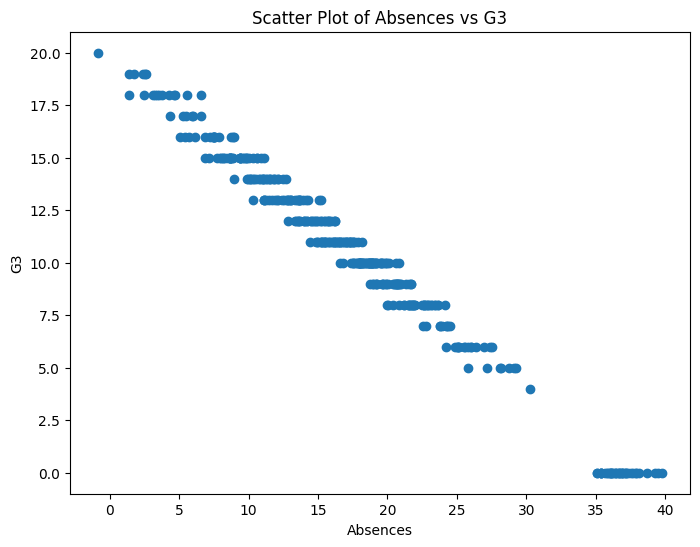

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(data['absences'], data['G3'])
plt.title('Scatter Plot of Absences vs G3')
plt.xlabel('Absences')
plt.ylabel('G3')
plt.show()

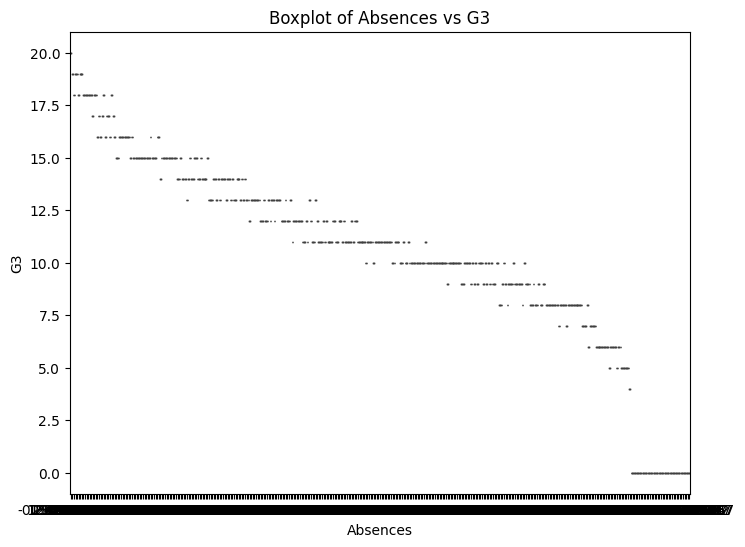

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='absences', y='G3', data=data)
plt.title('Boxplot of Absences vs G3')
plt.xlabel('Absences')
plt.ylabel('G3')
plt.show()

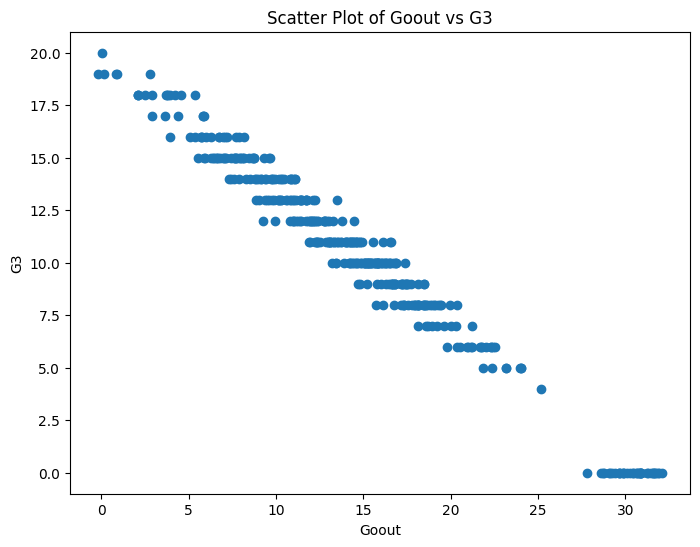

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['goout'], data['G3'])
plt.title('Scatter Plot of Goout vs G3')
plt.xlabel('Goout')
plt.ylabel('G3')
plt.show()

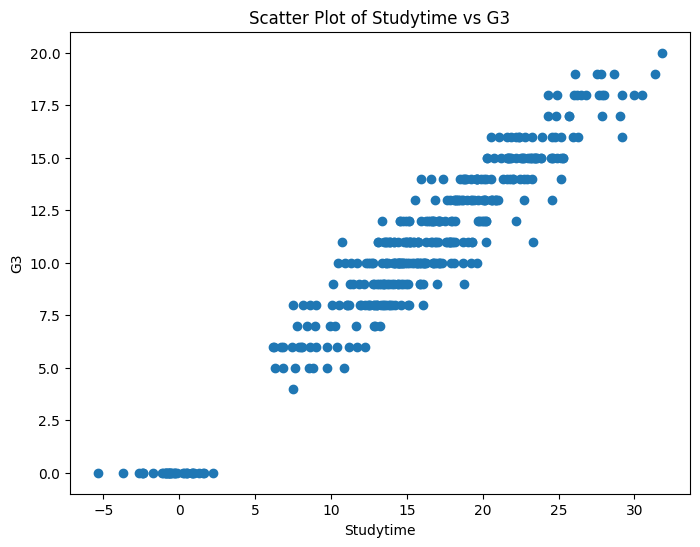

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['studytime'], data['G3'])
plt.title('Scatter Plot of Studytime vs G3')
plt.xlabel('Studytime')
plt.ylabel('G3')
plt.show()

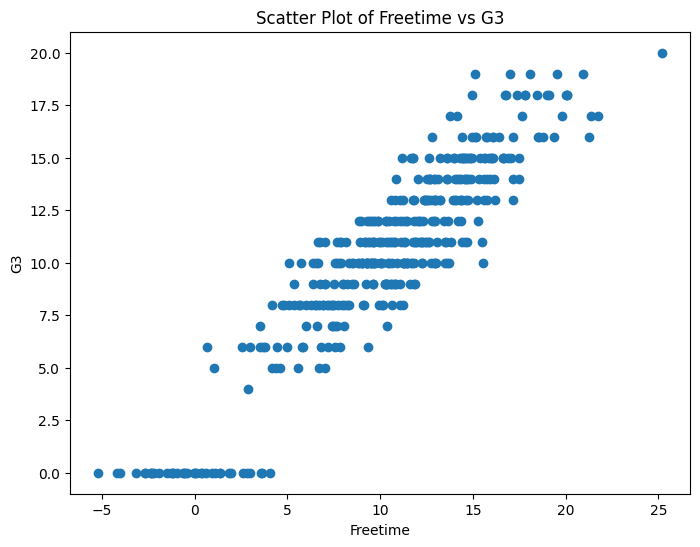

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['freetime'], data['G3'])
plt.title('Scatter Plot of Freetime vs G3')
plt.xlabel('Freetime')
plt.ylabel('G3')
plt.show()

R-squared: 0.986134103413612
RMSE: 0.5332174649409016
Accuracy: 0.8860759493670886


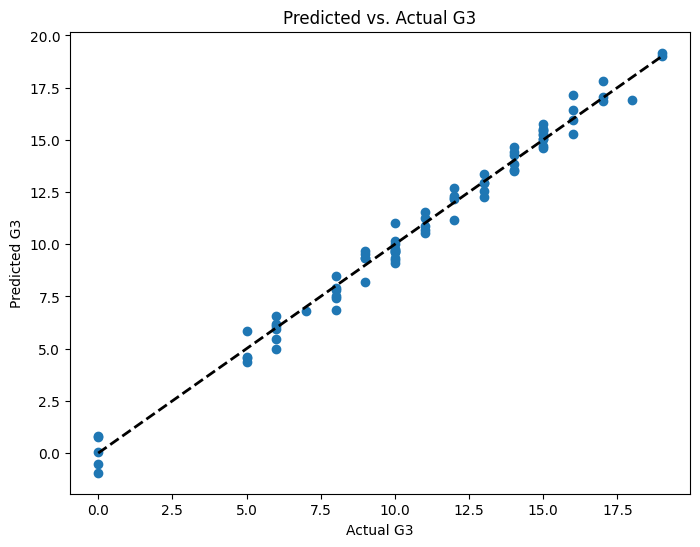

In [ ]:
!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# Select features
X = data[['absences', 'studytime', 'G2']]
y = data['G3']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate performance
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE from MSE

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# Accuracy (assuming G3 >= 10 is considered pass)
y_pred_classes = [1 if p >= 10 else 0 for p in y_pred]
y_test_classes = [1 if p >= 10 else 0 for p in y_test]
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Visualize predicted vs. actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Predicted vs. Actual G3')
plt.show()

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'student_performance_model.pkl')

['student_performance_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('student_performance_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    absences = data['absences']
    studytime = data['studytime']
    G2 = data['G2']

    prediction = model.predict([[absences, studytime, G2]])[0]

    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
